# ***Midterm-Project: Housing Market Study 2014-15***

In [657]:
# we need to import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
from ipywidgets import interactive
import ipywidgets as widgets
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn import linear_model
from sklearn.linear_model import Ridge
from haversine import haversine
import joblib


## Loading Data

In [551]:
file1=pd.read_excel("Data/Data_MidTerm_Project_Real_State_Regression.xls").reset_index()
file2=pd.read_csv("Data/geografical.csv")



In [552]:
file1

,index,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,21592,263000018,2014-05-21,3,2.50,1530,1131,3.0,0,0,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,21593,6600060120,2015-02-23,4,2.50,2310,5813,2.0,0,0,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,21594,1523300141,2014-06-23,2,0.75,1020,1350,2.0,0,0,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,21595,291310100,2015-01-16,3,2.50,1600,2388,2.0,0,0,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


In [553]:
file2

,distance_from_seattle,distance_from_bellevue
0,12.415876,12.267685
1,12.498932,14.551498
2,16.267167,13.777827
3,10.710732,17.670163
4,21.852320,11.912804
...,...,...
21592,10.044986,14.140797
21593,11.121189,16.631656
21594,3.244903,7.506265
21595,21.704934,13.552025


In [554]:

df=pd.concat([file1,file2],axis=1).reset_index(drop=True)

## Final data set 

In [555]:
df

,index,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,distance_from_seattle,distance_from_bellevue
0,0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,221900,12.415876,12.267685
1,1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,538000,12.498932,14.551498
2,2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,180000,16.267167,13.777827
3,3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,604000,10.710732,17.670163
4,4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,510000,21.852320,11.912804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,21592,263000018,2014-05-21,3,2.50,1530,1131,3.0,0,0,...,2009,0,98103,47.6993,-122.346,1530,1509,360000,10.044986,14.140797
21593,21593,6600060120,2015-02-23,4,2.50,2310,5813,2.0,0,0,...,2014,0,98146,47.5107,-122.362,1830,7200,400000,11.121189,16.631656
21594,21594,1523300141,2014-06-23,2,0.75,1020,1350,2.0,0,0,...,2009,0,98144,47.5944,-122.299,1020,2007,402101,3.244903,7.506265
21595,21595,291310100,2015-01-16,3,2.50,1600,2388,2.0,0,0,...,2004,0,98027,47.5345,-122.069,1410,1287,400000,21.704934,13.552025


## Important Funtions

In [556]:
def clean_data(df):
    
    df=df.drop(columns=['id', 'lat',"long","date","index"])
    
    
    return df

In [557]:
clean_data(df)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,distance_from_seattle,distance_from_bellevue
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650,221900,12.415876,12.267685
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639,538000,12.498932,14.551498
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062,180000,16.267167,13.777827
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000,604000,10.710732,17.670163
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503,510000,21.852320,11.912804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,1530,1509,360000,10.044986,14.140797
21593,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,1830,7200,400000,11.121189,16.631656
21594,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,1020,2007,402101,3.244903,7.506265
21595,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,1410,1287,400000,21.704934,13.552025


In [558]:
def outliers_removal(column):
    percentile25 = X[column].quantile(0.25)
    percentile75 = X[column].quantile(0.75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    X[X[column] > upper_limit]

    X[X[column] < lower_limit]
    new_X = X[X[column] < upper_limit]
    new_X.shape
    new_X_cap = X.copy()
    new_X_cap[column] = np.where(
        new_X_cap[column] > upper_limit,
        upper_limit,
        np.where(
            new_X_cap[column] < lower_limit,
            lower_limit,
            new_X_cap[column]
        )
    )
    plt.figure(figsize=(8,8))

    plt.subplot(2,2,1)
    sns.boxplot(X[column])

    plt.subplot(2,2,2)
    sns.boxplot(new_X_cap[column])

    plt.show()

In [559]:
df=clean_data(df)

In [560]:
df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,distance_from_seattle,distance_from_bellevue
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650,221900,12.415876,12.267685
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639,538000,12.498932,14.551498
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062,180000,16.267167,13.777827
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000,604000,10.710732,17.670163
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503,510000,21.852320,11.912804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,1530,1509,360000,10.044986,14.140797
21593,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,1830,7200,400000,11.121189,16.631656
21594,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,1020,2007,402101,3.244903,7.506265
21595,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,1410,1287,400000,21.704934,13.552025


## Data type

In [561]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   bedrooms                21597 non-null  int64  
 1   bathrooms               21597 non-null  float64
 2   sqft_living             21597 non-null  int64  
 3   sqft_lot                21597 non-null  int64  
 4   floors                  21597 non-null  float64
 5   waterfront              21597 non-null  int64  
 6   view                    21597 non-null  int64  
 7   condition               21597 non-null  int64  
 8   grade                   21597 non-null  int64  
 9   sqft_above              21597 non-null  int64  
 10  sqft_basement           21597 non-null  int64  
 11  yr_built                21597 non-null  int64  
 12  yr_renovated            21597 non-null  int64  
 13  zipcode                 21597 non-null  int64  
 14  sqft_living15           21597 non-null

## Removing duplicates

In [562]:
df.drop_duplicates(inplace=True)

In [563]:
df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,distance_from_seattle,distance_from_bellevue
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650,221900,12.415876,12.267685
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639,538000,12.498932,14.551498
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062,180000,16.267167,13.777827
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000,604000,10.710732,17.670163
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503,510000,21.852320,11.912804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,1530,1509,360000,10.044986,14.140797
21593,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,1830,7200,400000,11.121189,16.631656
21594,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,1020,2007,402101,3.244903,7.506265
21595,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,1410,1287,400000,21.704934,13.552025


## Creating data groups

In [564]:
#We think the column "bathrooms" sould be binned
bins= [0,1,2,3,4,5,6,7,8]
labels=["1","2","3","4","5","6","7","8+"]
df["bathrooms"]= pd.cut(df["bathrooms"],bins,labels=labels)




In [565]:
# We also need to bin the yr_built
np.min(df["yr_built"])
np.max(df["yr_built"])
print(np.min(df["yr_built"]))
print(np.max(df["yr_built"]))            


1900
2015


In [566]:
bins= [1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020]
labels=["00s","10s","20s","30s","40s","50s","60s","70s","80s","90s","2000s","2010s"]

df["yr_built"]= pd.cut(df["yr_built"],bins,labels=labels)

df


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,distance_from_seattle,distance_from_bellevue
0,3,1,1180,5650,1.0,0,0,3,7,1180,0,50s,0,98178,1340,5650,221900,12.415876,12.267685
1,3,3,2570,7242,2.0,0,0,3,7,2170,400,50s,1991,98125,1690,7639,538000,12.498932,14.551498
2,2,1,770,10000,1.0,0,0,3,6,770,0,30s,0,98028,2720,8062,180000,16.267167,13.777827
3,4,3,1960,5000,1.0,0,0,5,7,1050,910,60s,0,98136,1360,5000,604000,10.710732,17.670163
4,3,2,1680,8080,1.0,0,0,3,8,1680,0,80s,0,98074,1800,7503,510000,21.852320,11.912804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,3,1530,1131,3.0,0,0,3,8,1530,0,2000s,0,98103,1530,1509,360000,10.044986,14.140797
21593,4,3,2310,5813,2.0,0,0,3,8,2310,0,2010s,0,98146,1830,7200,400000,11.121189,16.631656
21594,2,1,1020,1350,2.0,0,0,3,7,1020,0,2000s,0,98144,1020,2007,402101,3.244903,7.506265
21595,3,3,1600,2388,2.0,0,0,3,8,1600,0,2000s,0,98027,1410,1287,400000,21.704934,13.552025


In [567]:
#We also need to bin "yr_renovated"



bins= [-2.,1930.,1940.,1950.,1960.,1970.,1980.,1990.,2000.,2010.,2020.]
labels=["No_renovated","30s","40s","50s","60s","70s","80s","90s","2000s","2010s"]

df["yr_renovated"]= pd.cut(df["yr_renovated"],bins,labels=labels)




In [568]:
df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,distance_from_seattle,distance_from_bellevue
0,3,1,1180,5650,1.0,0,0,3,7,1180,0,50s,No_renovated,98178,1340,5650,221900,12.415876,12.267685
1,3,3,2570,7242,2.0,0,0,3,7,2170,400,50s,90s,98125,1690,7639,538000,12.498932,14.551498
2,2,1,770,10000,1.0,0,0,3,6,770,0,30s,No_renovated,98028,2720,8062,180000,16.267167,13.777827
3,4,3,1960,5000,1.0,0,0,5,7,1050,910,60s,No_renovated,98136,1360,5000,604000,10.710732,17.670163
4,3,2,1680,8080,1.0,0,0,3,8,1680,0,80s,No_renovated,98074,1800,7503,510000,21.852320,11.912804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,3,1530,1131,3.0,0,0,3,8,1530,0,2000s,No_renovated,98103,1530,1509,360000,10.044986,14.140797
21593,4,3,2310,5813,2.0,0,0,3,8,2310,0,2010s,No_renovated,98146,1830,7200,400000,11.121189,16.631656
21594,2,1,1020,1350,2.0,0,0,3,7,1020,0,2000s,No_renovated,98144,1020,2007,402101,3.244903,7.506265
21595,3,3,1600,2388,2.0,0,0,3,8,1600,0,2000s,No_renovated,98027,1410,1287,400000,21.704934,13.552025


In [569]:
# We need to bin bedrooms. 
bins= [0,1,2,3,4,5,6,7,34]
labels=["1","2","3","4","5","6","7","8+"]

df["bedrooms"]= pd.cut(df["bedrooms"],bins,labels=labels)




In [570]:
#We also need to bin "sqft_basement"
bins= [-1,0.1,6091]
labels =["no","yes"]

df["sqft_basement"]= pd.cut(df["sqft_basement"],bins,labels=labels)


In [571]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21592 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   bedrooms                21592 non-null  category
 1   bathrooms               21592 non-null  category
 2   sqft_living             21592 non-null  int64   
 3   sqft_lot                21592 non-null  int64   
 4   floors                  21592 non-null  float64 
 5   waterfront              21592 non-null  int64   
 6   view                    21592 non-null  int64   
 7   condition               21592 non-null  int64   
 8   grade                   21592 non-null  int64   
 9   sqft_above              21592 non-null  int64   
 10  sqft_basement           21592 non-null  category
 11  yr_built                21505 non-null  category
 12  yr_renovated            21592 non-null  category
 13  zipcode                 21592 non-null  int64   
 14  sqft_living15         

### Convert integer into categorical

In [572]:
# with this formula we will convert integer into categorical

list= df[["zipcode","sqft_basement","bedrooms",'bathrooms',"floors",'waterfront','view',"condition","grade","yr_built","yr_renovated"]]



df[["zipcode","sqft_basement","bedrooms",'bathrooms',"floors",'waterfront','view',"condition","grade","yr_built","yr_renovated"]]=list.astype(str)



In [573]:
df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,distance_from_seattle,distance_from_bellevue
0,3,1,1180,5650,1.0,0,0,3,7,1180,no,50s,No_renovated,98178,1340,5650,221900,12.415876,12.267685
1,3,3,2570,7242,2.0,0,0,3,7,2170,yes,50s,90s,98125,1690,7639,538000,12.498932,14.551498
2,2,1,770,10000,1.0,0,0,3,6,770,no,30s,No_renovated,98028,2720,8062,180000,16.267167,13.777827
3,4,3,1960,5000,1.0,0,0,5,7,1050,yes,60s,No_renovated,98136,1360,5000,604000,10.710732,17.670163
4,3,2,1680,8080,1.0,0,0,3,8,1680,no,80s,No_renovated,98074,1800,7503,510000,21.852320,11.912804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,3,1530,1131,3.0,0,0,3,8,1530,no,2000s,No_renovated,98103,1530,1509,360000,10.044986,14.140797
21593,4,3,2310,5813,2.0,0,0,3,8,2310,no,2010s,No_renovated,98146,1830,7200,400000,11.121189,16.631656
21594,2,1,1020,1350,2.0,0,0,3,7,1020,no,2000s,No_renovated,98144,1020,2007,402101,3.244903,7.506265
21595,3,3,1600,2388,2.0,0,0,3,8,1600,no,2000s,No_renovated,98027,1410,1287,400000,21.704934,13.552025


In [574]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21592 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   bedrooms                21592 non-null  object 
 1   bathrooms               21592 non-null  object 
 2   sqft_living             21592 non-null  int64  
 3   sqft_lot                21592 non-null  int64  
 4   floors                  21592 non-null  object 
 5   waterfront              21592 non-null  object 
 6   view                    21592 non-null  object 
 7   condition               21592 non-null  object 
 8   grade                   21592 non-null  object 
 9   sqft_above              21592 non-null  int64  
 10  sqft_basement           21592 non-null  object 
 11  yr_built                21592 non-null  object 
 12  yr_renovated            21592 non-null  object 
 13  zipcode                 21592 non-null  object 
 14  sqft_living15           21592 non-null

## Correlation analysis

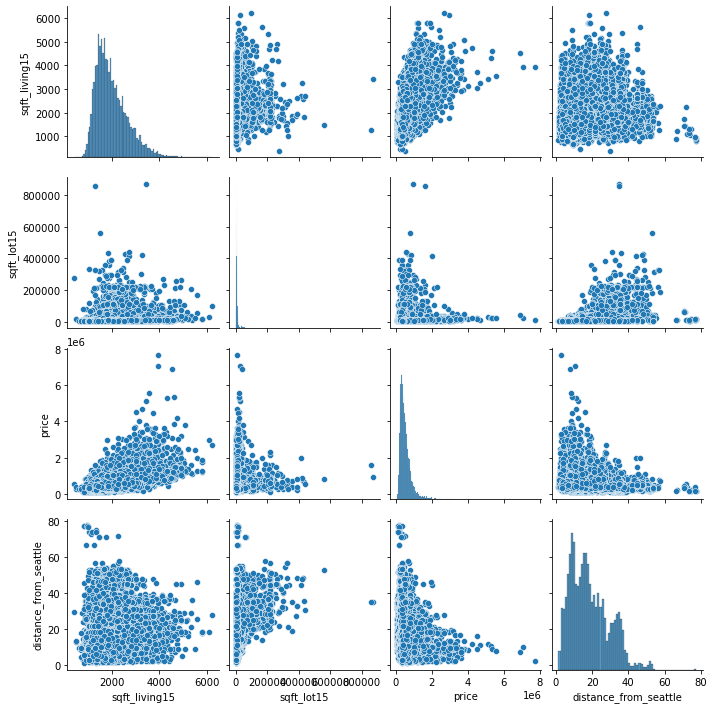

In [584]:
# pairplots
sns.pairplot(X)

In [575]:
# Correlation matrix
df.corr()

,sqft_living,sqft_lot,sqft_above,sqft_living15,sqft_lot15,price,distance_from_seattle,distance_from_bellevue
sqft_living,1.000000,0.173436,0.876444,0.756380,0.184315,0.701917,0.076053,-0.101759
sqft_lot,0.173436,1.000000,0.184135,0.144750,0.718200,0.089868,0.242572,0.177633
sqft_above,0.876444,0.184135,1.000000,0.731742,0.195062,0.605359,0.192246,-0.015720
sqft_living15,0.756380,0.144750,0.731742,1.000000,0.183489,0.585240,0.136423,-0.104141
sqft_lot15,0.184315,0.718200,0.195062,0.183489,1.000000,0.082833,0.269402,0.191344
price,0.701917,0.089868,0.605359,0.585240,0.082833,1.000000,-0.287127,-0.411407
distance_from_seattle,0.076053,0.242572,0.192246,0.136423,0.269402,-0.287127,1.000000,0.850286
distance_from_bellevue,-0.101759,0.177633,-0.015720,-0.104141,0.191344,-0.411407,0.850286,1.000000


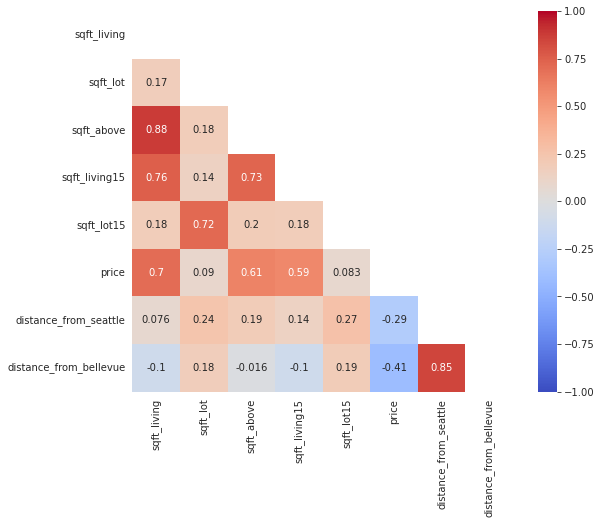

In [576]:
#Heatmap
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

In [577]:
#drop high correlated variables. 

df.drop(columns=["sqft_living","sqft_lot","sqft_above","distance_from_bellevue"], inplace=True)

In [578]:
df

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,distance_from_seattle
0,3,1,1.0,0,0,3,7,no,50s,No_renovated,98178,1340,5650,221900,12.415876
1,3,3,2.0,0,0,3,7,yes,50s,90s,98125,1690,7639,538000,12.498932
2,2,1,1.0,0,0,3,6,no,30s,No_renovated,98028,2720,8062,180000,16.267167
3,4,3,1.0,0,0,5,7,yes,60s,No_renovated,98136,1360,5000,604000,10.710732
4,3,2,1.0,0,0,3,8,no,80s,No_renovated,98074,1800,7503,510000,21.852320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,3,3.0,0,0,3,8,no,2000s,No_renovated,98103,1530,1509,360000,10.044986
21593,4,3,2.0,0,0,3,8,no,2010s,No_renovated,98146,1830,7200,400000,11.121189
21594,2,1,2.0,0,0,3,7,no,2000s,No_renovated,98144,1020,2007,402101,3.244903
21595,3,3,2.0,0,0,3,8,no,2000s,No_renovated,98027,1410,1287,400000,21.704934


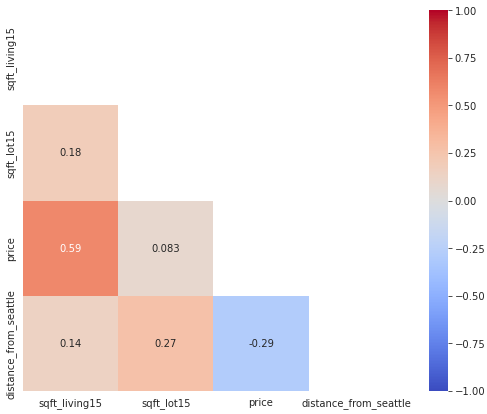

In [579]:
# New Heatmap without high correlation variables. 
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

In [580]:
df.corr()

,sqft_living15,sqft_lot15,price,distance_from_seattle
sqft_living15,1.000000,0.183489,0.585240,0.136423
sqft_lot15,0.183489,1.000000,0.082833,0.269402
price,0.585240,0.082833,1.000000,-0.287127
distance_from_seattle,0.136423,0.269402,-0.287127,1.000000


In [581]:
df.corr().to_csv("correllation.csv")

## Removing outliers

### Numerical variables

In [659]:
X=df._get_numeric_data()

In [583]:
X

,sqft_living15,sqft_lot15,price,distance_from_seattle
0,1340,5650,221900,12.415876
1,1690,7639,538000,12.498932
2,2720,8062,180000,16.267167
3,1360,5000,604000,10.710732
4,1800,7503,510000,21.852320
...,...,...,...,...
21592,1530,1509,360000,10.044986
21593,1830,7200,400000,11.121189
21594,1020,2007,402101,3.244903
21595,1410,1287,400000,21.704934


### Boxplots

<AxesSubplot:>

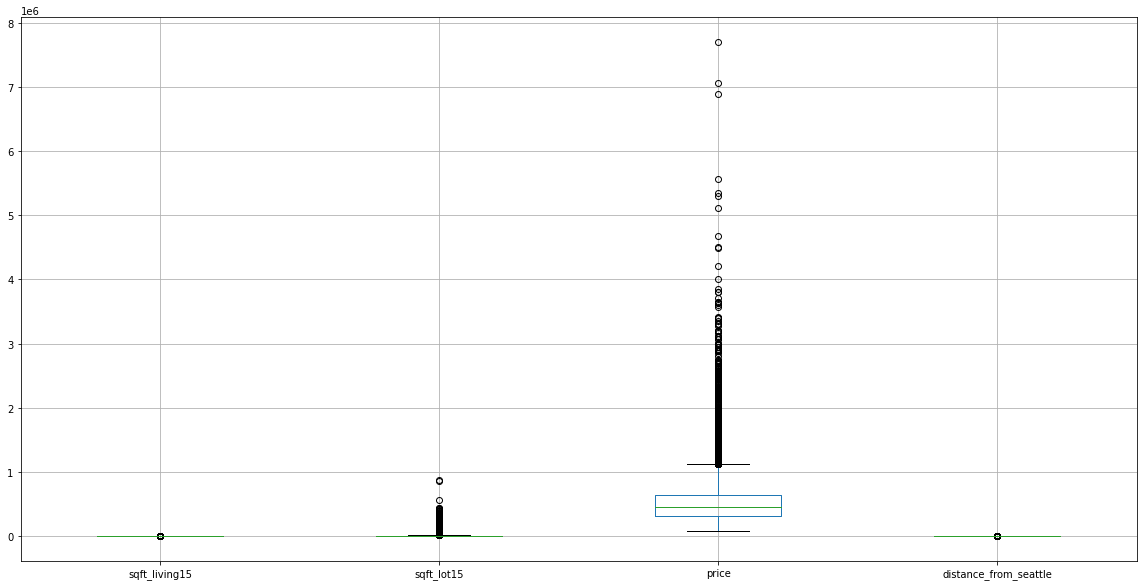

In [585]:
#Boxplot to detect outliers

X.boxplot(figsize=(20,10))

In [586]:
#we have outliers in our numerical variables

#### Removing outliers from "sqft_lot15"

C:\Users\merce\anaconda3\envs\Da_Env1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\merce\anaconda3\envs\Da_Env1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


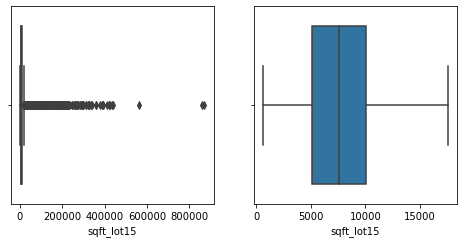

In [587]:
outliers_removal("sqft_lot15")

In [588]:
#df["sqft_lot15"]=df[df["sqft_lot15"]<400000]
df=df[df["sqft_lot15"]<4000000]

#### Removing outliers from "sqft_living15"

C:\Users\merce\anaconda3\envs\Da_Env1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\merce\anaconda3\envs\Da_Env1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


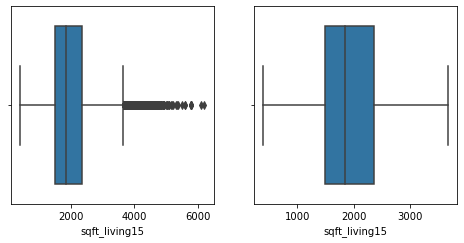

In [589]:
outliers_removal("sqft_living15")

In [590]:
#df["sqft_living15"]=df[df["sqft_living15"]<4000]
df=df[df["sqft_living15"]<6000]


#### Removing outliers from "distance_from_seattle"

C:\Users\merce\anaconda3\envs\Da_Env1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\merce\anaconda3\envs\Da_Env1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


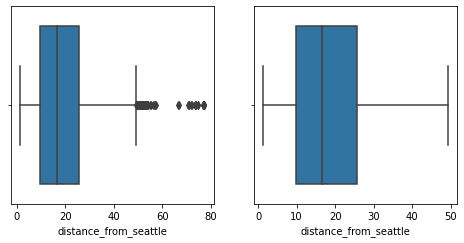

In [591]:
outliers_removal("distance_from_seattle")

In [592]:
df=df[df["distance_from_seattle"]<45]


## Normality (numerical variables)

array([[<AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'center':'sqft_lot15'}>],
       [<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'distance_from_seattle'}>]],
      dtype=object)

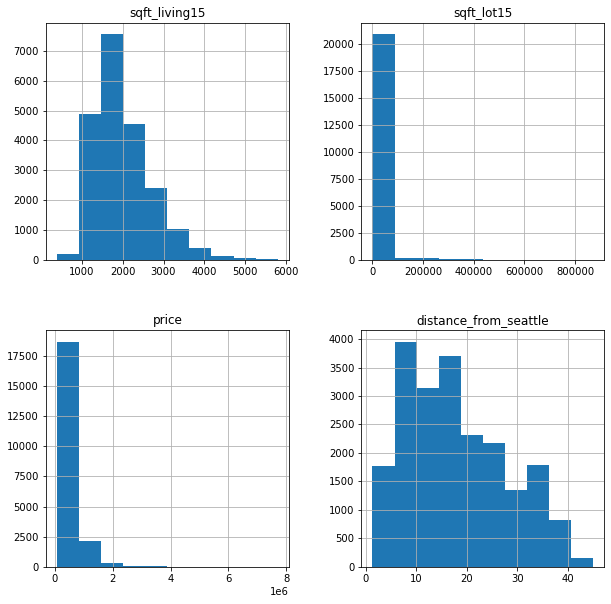

In [596]:
#histograms

X.hist(figsize=(10,10))

### Power transformation

#### Power transformation in 'sqft_lot15'

C:\Users\merce\anaconda3\envs\Da_Env1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sqft_lot15', ylabel='Density'>

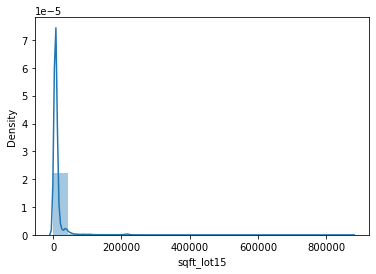

In [597]:
# We use Power Transformation to transform all variables into normal distribution

sns.distplot((df['sqft_lot15']), bins=20)

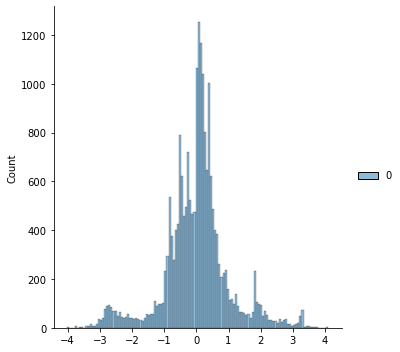

In [598]:
pt = PowerTransformer(method="box-cox")
med_sqft_lot15_trans=pt.fit_transform(df['sqft_lot15'].to_numpy().reshape(-1,1))
sns.displot(med_sqft_lot15_trans)

#### Power transformation in 'sqft_living15'

C:\Users\merce\anaconda3\envs\Da_Env1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sqft_living15', ylabel='Density'>

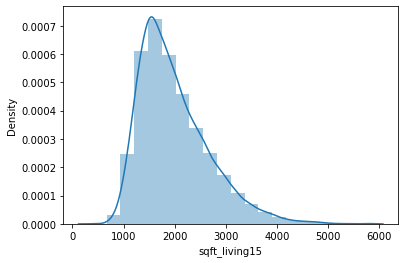

In [599]:
sns.distplot((df['sqft_living15']), bins=20)

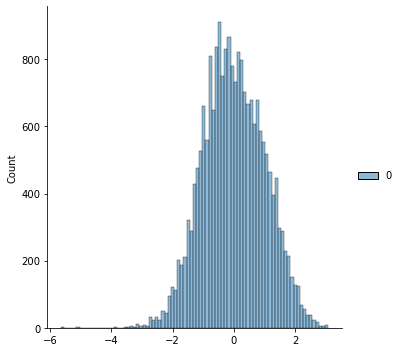

In [600]:
pt = PowerTransformer(method="box-cox")
med_sqft_living15_trans=pt.fit_transform(df['sqft_living15'].to_numpy().reshape(-1,1))
sns.displot(med_sqft_living15_trans)

In [601]:
# We need to introduce the transform variables in the model

df["med_sqft_lot15_trans"]= med_sqft_lot15_trans
df["med_sqft_living15_trans"]= med_sqft_living15_trans


In [602]:
# We need to delete the old column

df.drop(["sqft_living15"],axis=1,inplace=True)
df.drop(["sqft_lot15"],axis=1,inplace=True)
 

#### Data frame with transformed variables

In [603]:
df

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,price,distance_from_seattle,med_sqft_lot15_trans,med_sqft_living15_trans
0,3,1,1.0,0,0,3,7,no,50s,No_renovated,98178,221900,12.415876,-0.331342,-1.048901
1,3,3,2.0,0,0,3,7,yes,50s,90s,98125,538000,12.498932,0.072395,-0.301169
2,2,1,1.0,0,0,3,6,no,30s,No_renovated,98028,180000,16.267167,0.142093,1.116296
3,4,3,1.0,0,0,5,7,yes,60s,No_renovated,98136,604000,10.710732,-0.501762,-0.999998
4,3,2,1.0,0,0,3,8,no,80s,No_renovated,98074,510000,21.852320,0.049002,-0.104588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,3,3.0,0,0,3,8,no,2000s,No_renovated,98103,360000,10.044986,-2.403746,-0.616912
21593,4,3,2.0,0,0,3,8,no,2010s,No_renovated,98146,400000,11.121189,-0.004986,-0.053514
21594,2,1,2.0,0,0,3,7,no,2000s,No_renovated,98144,402101,3.244903,-1.910247,-1.979126
21595,3,3,2.0,0,0,3,8,no,2000s,No_renovated,98027,400000,21.704934,-2.691167,-0.881496


## Predective modeling

### XY split

In [604]:
# "price" is our dependent variable. 
# We have to separate our target variable from the others
X=df.drop('price', axis=1)
Y=df.price

In [605]:
X=X._get_numeric_data()

In [606]:
X

,distance_from_seattle,med_sqft_lot15_trans,med_sqft_living15_trans
0,12.415876,-0.331342,-1.048901
1,12.498932,0.072395,-0.301169
2,16.267167,0.142093,1.116296
3,10.710732,-0.501762,-0.999998
4,21.852320,0.049002,-0.104588
...,...,...,...
21592,10.044986,-2.403746,-0.616912
21593,11.121189,-0.004986,-0.053514
21594,3.244903,-1.910247,-1.979126
21595,21.704934,-2.691167,-0.881496


### Hot coding categorical variables¶

In [607]:
categorical_df=df.select_dtypes('object')

In [608]:
categorical_df

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode
0,3,1,1.0,0,0,3,7,no,50s,No_renovated,98178
1,3,3,2.0,0,0,3,7,yes,50s,90s,98125
2,2,1,1.0,0,0,3,6,no,30s,No_renovated,98028
3,4,3,1.0,0,0,5,7,yes,60s,No_renovated,98136
4,3,2,1.0,0,0,3,8,no,80s,No_renovated,98074
...,...,...,...,...,...,...,...,...,...,...,...
21592,3,3,3.0,0,0,3,8,no,2000s,No_renovated,98103
21593,4,3,2.0,0,0,3,8,no,2010s,No_renovated,98146
21594,2,1,2.0,0,0,3,7,no,2000s,No_renovated,98144
21595,3,3,2.0,0,0,3,8,no,2000s,No_renovated,98027


In [609]:
# we get dummies for categorical variables
categorical_df=pd.get_dummies(categorical_df, drop_first=True)

In [610]:
categorical_df

,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8+,bathrooms_2,bathrooms_3,bathrooms_4,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
21593,0,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
21594,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21595,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


## Linear regression model

**modeling using statsmodels**

In [611]:
# We need to concat the numberical (X) and the catogorical variables:

X=pd.concat([X, categorical_df], axis=1) # concat numerical and categorical transformations

### Unscaled

In [612]:
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.20,random_state=1000 )

In [613]:
std_scaler=StandardScaler().fit(X_train)

X_train_scaled=std_scaler.transform(X_train)
X_test_scaled=std_scaler.transform(X_test)

In [614]:
X_train_constant= sm.add_constant(X_train)
X_test_constant= sm.add_constant(X_test)  #adding a constant
model=sm.OLS(y_train,X_train_constant).fit()
predictions=model.predict(X_test_constant)

print_model=model.summary()
print(print_model)


C:\Users\merce\anaconda3\envs\Da_Env1\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     591.5
Date:                Wed, 17 Nov 2021   Prob (F-statistic):               0.00
Time:                        15:29:00   Log-Likelihood:            -2.2720e+05
No. Observations:               16964   AIC:                         4.547e+05
Df Residuals:                   16832   BIC:                         4.557e+05
Df Model:                         131                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [615]:
# now, We need to identify the most important coefficients in our model. 
# We will organize the coefficients based on P-value

coefs = pd.DataFrame({
    'coef':model.params.values,
    'odds ratio': np.exp(model.params.values),
    'pvalue': model.pvalues,
    'name': model.params.index
}).sort_values(by='pvalue', ascending=False)
coefs


C:\Users\merce\AppData\Local\Temp/ipykernel_16200/1019201162.py:6: RuntimeWarning: overflow encountered in exp
  'odds ratio': np.exp(model.params.values),


,coef,odds ratio,pvalue,name
zipcode_98092,-4.453979e+03,0.0,7.425799e-01,zipcode_98092
floors_3.5,-2.171557e+04,0.0,7.406716e-01,floors_3.5
zipcode_98133,-7.698743e+03,0.0,6.733284e-01,zipcode_98133
yr_built_nan,9.857140e+03,inf,6.489262e-01,yr_built_nan
zipcode_98003,-7.238721e+03,0.0,6.078678e-01,zipcode_98003
...,...,...,...,...
grade_12,7.045142e+05,inf,6.533618e-247,grade_12
grade_13,1.765500e+06,inf,9.745489e-265,grade_13
grade_8,-2.949320e+05,0.0,0.000000e+00,grade_8
grade_6,-3.802805e+05,0.0,0.000000e+00,grade_6


In [616]:
# We want to know the coefficients with a P-value <0.05. 

coefs[coefs.pvalue < 0.05].drop('const')

,coef,odds ratio,pvalue,name
zipcode_98023,-2.499661e+04,0.0,4.534072e-02,zipcode_98023
yr_built_40s,-1.738306e+04,0.0,4.376587e-02,yr_built_40s
yr_built_30s,2.268183e+04,inf,3.069817e-02,yr_built_30s
yr_renovated_30s,-2.469504e+05,0.0,2.974024e-02,yr_renovated_30s
zipcode_98034,3.937864e+04,inf,2.218793e-02,zipcode_98034
...,...,...,...,...
grade_12,7.045142e+05,inf,6.533618e-247,grade_12
grade_13,1.765500e+06,inf,9.745489e-265,grade_13
grade_8,-2.949320e+05,0.0,0.000000e+00,grade_8
grade_6,-3.802805e+05,0.0,0.000000e+00,grade_6


In [617]:
feature_cols = coefs[coefs.pvalue < 0.05].drop('const').index
feature_cols

Index(['zipcode_98023', 'yr_built_40s', 'yr_built_30s', 'yr_renovated_30s',
       'zipcode_98034', 'zipcode_98077', 'zipcode_98177', 'floors_2.0',
       'yr_renovated_40s', 'zipcode_98148',
       ...
       'zipcode_98004', 'grade_9', 'grade_5', 'zipcode_98039', 'waterfront_1',
       'grade_12', 'grade_13', 'grade_8', 'grade_6', 'grade_7'],
      dtype='object', length=108)

In [618]:
#this is our data set without the irrelevant variables. 
feature_cols = X.columns[model.pvalues.drop('const') < 0.05]

In [619]:
#Run our regression just like we normally do without the irrelevant variables

X = X[feature_cols]
y = df.price


In [620]:
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.20, random_state=1000)

In [621]:
X_train_constant= sm.add_constant(X_train)
X_test_constant= sm.add_constant(X_test)  #adding a constant
model=sm.OLS(y_train,X_train_constant).fit()
predictions=model.predict(X_test_constant)

print_model=model.summary()
print(print_model)

C:\Users\merce\anaconda3\envs\Da_Env1\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     713.9
Date:                Wed, 17 Nov 2021   Prob (F-statistic):               0.00
Time:                        15:29:00   Log-Likelihood:            -2.2725e+05
No. Observations:               16964   AIC:                         4.547e+05
Df Residuals:                   16855   BIC:                         4.556e+05
Df Model:                         108                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [622]:
# We still have some irrelevant variables.(variables with P-value>0.05)

coefs = pd.DataFrame({
    'coef':model.params.values,
    'odds ratio': np.exp(model.params.values),
    'pvalue': model.pvalues,
    'name': model.params.index
}).sort_values(by='pvalue', ascending=False)
coefs


C:\Users\merce\AppData\Local\Temp/ipykernel_16200/977458081.py:5: RuntimeWarning: overflow encountered in exp
  'odds ratio': np.exp(model.params.values),


,coef,odds ratio,pvalue,name
floors_2.0,7783.499399,inf,0.062891,floors_2.0
yr_renovated_30s,-238971.974072,0.0,0.035403,yr_renovated_30s
zipcode_98023,-20017.949890,0.0,0.027930,zipcode_98023
yr_built_30s,18755.883289,inf,0.022543,yr_built_30s
yr_renovated_40s,-152332.645536,0.0,0.013505,yr_renovated_40s
...,...,...,...,...
grade_6,-377812.324829,0.0,0.000000,grade_6
grade_7,-346664.700389,0.0,0.000000,grade_7
grade_8,-294444.774156,0.0,0.000000,grade_8
distance_from_seattle,-10064.754245,0.0,0.000000,distance_from_seattle


In [623]:
coefs[coefs.pvalue < 0.05].drop('const')

,coef,odds ratio,pvalue,name
yr_renovated_30s,-238971.974072,0.0,0.035403,yr_renovated_30s
zipcode_98023,-20017.949890,0.0,0.027930,zipcode_98023
yr_built_30s,18755.883289,inf,0.022543,yr_built_30s
yr_renovated_40s,-152332.645536,0.0,0.013505,yr_renovated_40s
bedrooms_2,32194.704382,inf,0.008641,bedrooms_2
...,...,...,...,...
grade_6,-377812.324829,0.0,0.000000,grade_6
grade_7,-346664.700389,0.0,0.000000,grade_7
grade_8,-294444.774156,0.0,0.000000,grade_8
distance_from_seattle,-10064.754245,0.0,0.000000,distance_from_seattle


In [624]:
feature_cols = coefs[coefs.pvalue < 0.05].drop('const').index
feature_cols

Index(['yr_renovated_30s', 'zipcode_98023', 'yr_built_30s', 'yr_renovated_40s',
       'bedrooms_2', 'zipcode_98148', 'condition_2', 'zipcode_98077',
       'condition_3', 'zipcode_98032',
       ...
       'zipcode_98112', 'waterfront_1', 'grade_12', 'grade_13',
       'zipcode_98039', 'grade_6', 'grade_7', 'grade_8',
       'distance_from_seattle', 'zipcode_98004'],
      dtype='object', length=107)

In [625]:
feature_cols = X.columns[model.pvalues.drop('const') < 0.05]

####  Lineal regression model without irrelevant variables.

In [626]:
#Run our regression just like we normally do without the irrelevant variables

X = X[feature_cols]
y = df.price


In [627]:
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.20, random_state=1000)

In [628]:
X_train_constant= sm.add_constant(X_train)
X_test_constant= sm.add_constant(X_test)  #adding a constant
model=sm.OLS(y_train,X_train_constant).fit()
predictions=model.predict(X_test_constant)

print_model=model.summary()
print(print_model)

C:\Users\merce\anaconda3\envs\Da_Env1\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     720.4
Date:                Wed, 17 Nov 2021   Prob (F-statistic):               0.00
Time:                        15:29:01   Log-Likelihood:            -2.2725e+05
No. Observations:               16964   AIC:                         4.547e+05
Df Residuals:                   16856   BIC:                         4.556e+05
Df Model:                         107                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

#### Most important coefficients in our model

In [629]:
model.params.iloc[1:]

distance_from_seattle      -10054.366903
med_sqft_lot15_trans        40337.039292
med_sqft_living15_trans     35642.124162
bedrooms_2                  32464.153071
bedrooms_3                  61375.746715
                               ...      
zipcode_98177               43637.189908
zipcode_98178             -145920.287529
zipcode_98188             -108695.799154
zipcode_98198              -83858.350030
zipcode_98199              120826.581743
Length: 107, dtype: float64

In [630]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.params.iloc[1:]
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

In [631]:
features_importances=features_importances.head()

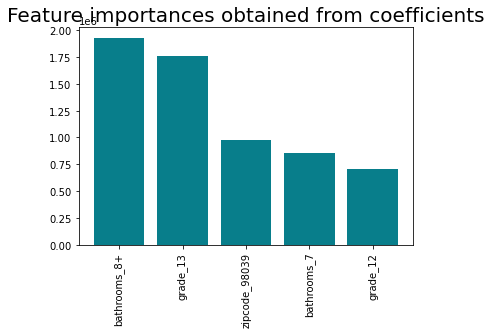

In [632]:
plt.bar(x=features_importances['Attribute'], height=features_importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

### Standardize

In [634]:
X = X[feature_cols]
y = df.price

In [635]:

X_scaled=StandardScaler().fit_transform(X)

In [636]:
X_scaled.shape

(21205, 107)

In [637]:
X_scaled

array([[-0.56514164, -0.33134217, -1.04890105, ..., -0.0803429 ,
        -0.1156768 , -0.12319163],
       [-0.55678183,  0.07239537, -0.30116863, ..., -0.0803429 ,
        -0.1156768 , -0.12319163],
       [-0.17749936,  0.14209341,  1.11629557, ..., -0.0803429 ,
        -0.1156768 , -0.12319163],
       ...,
       [-1.48822345, -1.91024654, -1.97912583, ..., -0.0803429 ,
        -0.1156768 , -0.12319163],
       [ 0.36982568, -2.69116671, -0.88149563, ..., -0.0803429 ,
        -0.1156768 , -0.12319163],
       [-1.48650715, -2.59452489, -1.97912583, ..., -0.0803429 ,
        -0.1156768 , -0.12319163]])

In [638]:
# we get our train and test data set
X_train, X_test, y_train, y_test=train_test_split(X_scaled, Y, test_size=0.20, random_state=1000)

#### Scaled Lineal regression model without irrelevant variables.

In [639]:
std_scaler=StandardScaler().fit(X_train)

X_train_scaled=std_scaler.transform(X_train)
X_test_scaled=std_scaler.transform(X_test)

In [640]:
X_train_scaled_constant= sm.add_constant(X_train_scaled)
X_test_scaled_constant= sm.add_constant(X_test_scaled)  #adding a constant

model=sm.OLS(y_train,X_train_scaled_constant).fit()
predictions=model.predict(X_train_scaled_constant)

print_model=model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     720.4
Date:                Wed, 17 Nov 2021   Prob (F-statistic):               0.00
Time:                        15:29:02   Log-Likelihood:            -2.2725e+05
No. Observations:               16964   AIC:                         4.547e+05
Df Residuals:                   16856   BIC:                         4.556e+05
Df Model:                         107                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.455e+05   1225.184    445.200      0.0

### Model comparison

#### Lineal regressión with Scikit Learn

In [641]:
model=LinearRegression()    # model
model.fit(X_train_scaled, y_train) 

LinearRegression()

In [642]:
#Coeffients

model.coef_

array([ -99943.73349393,   40258.27446126,   35731.69954024,
         10917.13238907,   30542.72136683,   37780.33479907,
         26909.4764518 ,   12126.08188213,    9962.74101506,
         28450.55217365,   35820.93170677,   35292.21404349,
         27888.08398284,   14741.80147478,   29653.35060357,
         12245.48749814,   -8706.40825322,   51488.84879368,
         10736.73441562,   17651.19882115,   26045.50338769,
         36824.10263527,    9418.96340654,   51890.769621  ,
         63757.74419415,   52523.04480388,   32661.95213691,
         46047.7090672 ,   46858.3350517 ,  -12797.02718752,
        -41984.57208749, -110190.78706854, -171833.19301692,
       -132554.28333818,  -58009.49986133,    4272.5873763 ,
          8453.48396157,    2882.6273389 ,   -7003.00281617,
        -14249.56103868,  -16117.21739524,  -17305.98731385,
        -16733.61932315,  -11443.07312457,   -7593.69823366,
         -2603.42461485,   -3111.58661948,   -6709.78382516,
        -11126.34940059,

In [643]:
# constant 

model.intercept_

545451.8246875735

In [644]:
# R2 with lineal regression model with Scikit Learn
model.score(X_test_scaled,y_test)

0.820557618838882

In [645]:
y_pred=model.predict(X_test_scaled) 

In [646]:
y_pred

array([420336.42719767, 394768.39407865, 894457.40418703, ...,
       535510.23872454, 278745.63578695, 428861.3239274 ])

In [647]:
y_test

12116     306888
5069      435000
14509     750000
19959     175003
9173      400000
          ...   
116       518500
20807    1490000
15872     500000
4578      302500
11659     342500
Name: price, Length: 4241, dtype: int64

In [648]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})

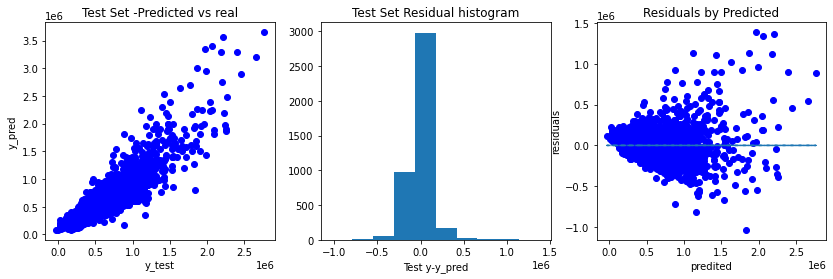

In [649]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, "o",color="blue")
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o",color="blue")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

<AxesSubplot:xlabel='y_pred', ylabel='y_test'>

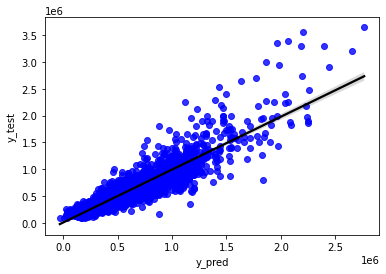

In [650]:
sns.regplot(x='y_pred',y='y_test', data=result, scatter_kws={"color": "blue"}, line_kws={"color": "black"})

####  Lasso

In [651]:
clf1 = linear_model.Lasso(alpha=1)
clf1.fit(X_train_scaled, y_train)


C:\Users\merce\anaconda3\envs\Da_Env1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 106017752626947.66, tolerance: 239217961818.2782
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=1)

In [652]:
#R2 Lasso Model
clf1.score(X_test_scaled,y_test)


0.8205610863053834

####  Ridge

In [653]:
### Ridge

In [654]:
clf2 = Ridge(alpha=1.0)
clf2.fit(X_train_scaled, y_train)


Ridge()

In [655]:
#R2 Ridge
clf2.score(X_test_scaled,y_test)

0.8205641628422775

## Conclusion